# 1. Project Overview 
This project analyzes the relationship between salary, education, and occupation across U.S. states using data from the Bureau of Labor Statistics (BLS) and the U.S. Census. The goal is to understand how these factors influence job opportunities and income levels in different geographical areas.

# 2.  Data Preparation


In [ ]:
# loading libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from datetime import datetime


## BLS Data Preparation

In [2]:
# Load the data using pandas
bls_data=pd.read_excel("./Ressources/bls_data.xlsx")
# Preview the first few rows to check if the data is being read correctly
display(bls_data.head(3))

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,...,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90
0,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,00-0000,All Occupations,...,13.97,17.14,23.11,37.01,58.4,29050,35660,48060,76980,121470
1,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-0000,Management Occupations,...,26.23,37.66,56.19,81.29,111.36,54550,78330,116880,169090,231620
2,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-1000,Top Executives,...,22.31,31.81,49.74,79.57,#,46400,66170,103460,165500,#


In [3]:
# check the columns names:
bls_data.columns

Index(['AREA', 'AREA_TITLE', 'AREA_TYPE', 'PRIM_STATE', 'NAICS', 'NAICS_TITLE',
       'I_GROUP', 'OWN_CODE', 'OCC_CODE', 'OCC_TITLE', 'O_GROUP', 'TOT_EMP',
       'EMP_PRSE', 'PCT_TOTAL', 'PCT_RPT', 'H_MEAN', 'A_MEAN', 'MEAN_PRSE',
       'H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75', 'H_PCT90', 'A_PCT10',
       'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90'],
      dtype='object')

In [ ]:
# Select the relevant columns from the DataFrame
relevant_columns = [
    'AREA_TITLE', 'OCC_CODE', 'OCC_TITLE', 'TOT_EMP', 'PRIM_STATE',
    'H_MEAN', 'A_MEAN', 'H_MEDIAN', 'A_MEDIAN'
]
# Subset the DataFrame 
bls_df = bls_data[relevant_columns]
bls_df.head()

,AREA_TITLE,OCC_CODE,OCC_TITLE,TOT_EMP,PRIM_STATE,H_MEAN,A_MEAN,H_MEDIAN,A_MEDIAN
0,U.S.,00-0000,All Occupations,151853870,US,31.48,65470,23.11,48060
1,U.S.,11-0000,Management Occupations,10495770,US,66.23,137750,56.19,116880
2,U.S.,11-1000,Top Executives,3751510,US,65.43,136100,49.74,103460
3,U.S.,11-1010,Chief Executives,211230,US,124.47,258900,99.37,206680
4,U.S.,11-1011,Chief Executives,211230,US,124.47,258900,99.37,206680


In [5]:
#check the dtypes of the df
bls_df.dtypes

AREA_TITLE    object
OCC_CODE      object
OCC_TITLE     object
TOT_EMP       object
PRIM_STATE    object
H_MEAN        object
A_MEAN        object
H_MEDIAN      object
A_MEDIAN      object
dtype: object

In [6]:
# Convert numeric columns to appropriate types (handle errors in conversion)
numeric_columns = ['TOT_EMP', 'H_MEAN', 'A_MEAN', 'H_MEDIAN', 'A_MEDIAN']
# Convert specified columns to numeric, handling errors with 'coerce'
bls_df.loc[:,numeric_columns] = bls_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Preview the cleaned data
bls_df.head()


C:\Users\marwa\AppData\Local\Temp\ipykernel_2588\4206975348.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bls_df.loc[:,numeric_columns] = bls_df[numeric_columns].apply(pd.to_numeric, errors='coerce')


,AREA_TITLE,OCC_CODE,OCC_TITLE,TOT_EMP,PRIM_STATE,H_MEAN,A_MEAN,H_MEDIAN,A_MEDIAN
0,U.S.,00-0000,All Occupations,151853870.0,US,31.48,65470.0,23.11,48060.0
1,U.S.,11-0000,Management Occupations,10495770.0,US,66.23,137750.0,56.19,116880.0
2,U.S.,11-1000,Top Executives,3751510.0,US,65.43,136100.0,49.74,103460.0
3,U.S.,11-1010,Chief Executives,211230.0,US,124.47,258900.0,99.37,206680.0
4,U.S.,11-1011,Chief Executives,211230.0,US,124.47,258900.0,99.37,206680.0


In [7]:
#recheck the data type
bls_df.dtypes

AREA_TITLE    object
OCC_CODE      object
OCC_TITLE     object
TOT_EMP       object
PRIM_STATE    object
H_MEAN        object
A_MEAN        object
H_MEDIAN      object
A_MEDIAN      object
dtype: object

In [8]:
#  Ensure that AREA_TITLE, and OCC_TITLE have consistent formatting 
#str.strip to Remove leading/trailing spaces and str.title to standardize case
bls_df.loc[:,'AREA_TITLE'] = bls_df['AREA_TITLE'].str.strip().str.title()#strip spaces and standardize text formatting 
bls_df.loc[:,'OCC_TITLE'] = bls_df['OCC_TITLE'].str.strip().str.title()


In [9]:
# Remove hyphen and the invalid code from the OCC_CODE column
bls_df.loc[:,'OCC_CODE'] = bls_df['OCC_CODE'].str.replace('-', '', regex=False).replace('', np.nan).dropna()

In [10]:
# Get the unique values for each column in the DataFrame
unique_values = bls_df.apply(lambda x: x.unique())

# Display the unique values for each column
print(unique_values)

AREA_TITLE    [U.S., Alabama, Alaska, Arizona, Arkansas, Cal...
OCC_CODE      [000000, 110000, 111000, 111010, 111011, 11102...
OCC_TITLE     [All Occupations, Management Occupations, Top ...
TOT_EMP       [151853870.0, 10495770.0, 3751510.0, 211230.0,...
PRIM_STATE    [US, AL, AK, AZ, AR, CA, CO, CT, DE, DC, FL, G...
H_MEAN        [31.48, 66.23, 65.43, 124.47, 62.18, nan, 76.9...
A_MEAN        [65470.0, 137750.0, 136100.0, 258900.0, 129330...
H_MEDIAN      [23.11, 56.19, 49.74, 99.37, 48.69, nan, 67.23...
A_MEDIAN      [48060.0, 116880.0, 103460.0, 206680.0, 101280...
dtype: object


In [11]:
#check and count the missing values
missing_values=bls_df.isna().sum()
missing_values

AREA_TITLE        0
OCC_CODE          0
OCC_TITLE         0
TOT_EMP       11598
PRIM_STATE        0
H_MEAN        20964
A_MEAN         5352
H_MEDIAN      23059
A_MEDIAN       7474
dtype: int64

In [12]:
#drop all the missing values from  the data
bls_df=bls_df.dropna(how='any')
# check all the remove values
bls_df.shape
# bls_df.isna().sum()

(378880, 9)

In [14]:
# ensure to keep only the 50 us state while excluding the others 
unwanted_state=['GU','PR','VI','DC']
bls_clean=bls_df[~bls_df['PRIM_STATE'].isin(unwanted_state)]
bls_clean['PRIM_STATE'].unique()

array(['US', 'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [15]:
# filter dataset to include only rows where the annual mean wage (A_MEAN) or hourly wage (H_MEAN) exceeds the equivalent of $100K per year.
bls_clean = bls_clean[(bls_clean['A_MEAN'] >= 100000) | (bls_clean['H_MEAN'] >= 48.08)]
bls_clean.tail(2)

,AREA_TITLE,OCC_CODE,OCC_TITLE,TOT_EMP,PRIM_STATE,H_MEAN,A_MEAN,H_MEDIAN,A_MEDIAN
412118,Southwest Louisiana Nonmetropolitan Area,535031,Ship Engineers,90.0,LA,54.82,114020.0,52.71,109630.0
412119,Southwest Mississippi Nonmetropolitan Area,535031,Ship Engineers,40.0,MS,55.86,116200.0,61.22,127330.0


 
### Distinguish between National-Level Data and State-Level Data:

- We noticed that the national-level data is identified under the PRIM_STATE column as 'US', and the AREA_TITLE typically mentions 'U.S.' to indicate that the row represents data aggregated for the entire U.S. rather than a specific state.

- State-Level Data: All other rows represent state-specific data, where the PRIM_STATE column corresponds to the state abbreviation (like 'CA' for California, 'TX' for Texas, etc.)


In [16]:
# Create a new column 'LEVEL' to tag national data based on 'PRIM_STATE' and 'AREA_TITLE'
bls_clean.loc[:,'LEVEL'] = bls_clean.apply(
    lambda row: 'National' if row['PRIM_STATE'] == 'US' and 'U.S.' in row['AREA_TITLE'] else 'State', 
    axis=1
)

# Preview to check the tagging
bls_clean[['PRIM_STATE', 'AREA_TITLE', 'LEVEL']].head()


,PRIM_STATE,AREA_TITLE,LEVEL
1,US,U.S.,National
2,US,U.S.,National
3,US,U.S.,National
4,US,U.S.,National
5,US,U.S.,National


- Data Integrity: 
By tagging the national and state data explicitly, we ensure that the national-level data is treated separately, avoiding issues when conducting state-level analyses or visualizations.

In [17]:
# Isolate state-level data and national-level analysis for comparison.
bls_state_data = bls_clean[bls_clean['LEVEL'] == 'State']
National_data=bls_clean[bls_clean['LEVEL']=='National']
display(bls_state_data.head())
display(National_data.head())

,AREA_TITLE,OCC_CODE,OCC_TITLE,TOT_EMP,PRIM_STATE,H_MEAN,A_MEAN,H_MEDIAN,A_MEDIAN,LEVEL
177552,Alabama,110000,Management Occupations,105580.0,AL,56.21,116920.0,47.95,99740.0,State
177553,Alaska,110000,Management Occupations,23750.0,AK,59.74,124260.0,52.25,108680.0,State
177554,Arizona,110000,Management Occupations,232000.0,AZ,59.53,123820.0,49.31,102560.0,State
177556,California,110000,Management Occupations,1308800.0,CA,77.1,160360.0,65.31,135840.0,State
177557,Colorado,110000,Management Occupations,156700.0,CO,74.99,155970.0,65.95,137170.0,State


,AREA_TITLE,OCC_CODE,OCC_TITLE,TOT_EMP,PRIM_STATE,H_MEAN,A_MEAN,H_MEDIAN,A_MEDIAN,LEVEL
1,U.S.,110000,Management Occupations,10495770.0,US,66.23,137750.0,56.19,116880.0,National
2,U.S.,111000,Top Executives,3751510.0,US,65.43,136100.0,49.74,103460.0,National
3,U.S.,111010,Chief Executives,211230.0,US,124.47,258900.0,99.37,206680.0,National
4,U.S.,111011,Chief Executives,211230.0,US,124.47,258900.0,99.37,206680.0,National
5,U.S.,111020,General And Operations Managers,3507810.0,US,62.18,129330.0,48.69,101280.0,National


In [18]:
# check  the type after data split
bls_state_data.dtypes

AREA_TITLE    object
OCC_CODE      object
OCC_TITLE     object
TOT_EMP       object
PRIM_STATE    object
H_MEAN        object
A_MEAN        object
H_MEDIAN      object
A_MEDIAN      object
LEVEL         object
dtype: object

In [19]:
# Convert specified columns to numeric, handling errors with 'coerce'
bls_state_data[numeric_columns] =bls_state_data[numeric_columns].apply(pd.to_numeric, errors='coerce')
# Preview the cleaned data
bls_state_data.head()

C:\Users\marwa\AppData\Local\Temp\ipykernel_2588\144381960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bls_state_data[numeric_columns] =bls_state_data[numeric_columns].apply(pd.to_numeric, errors='coerce')


,AREA_TITLE,OCC_CODE,OCC_TITLE,TOT_EMP,PRIM_STATE,H_MEAN,A_MEAN,H_MEDIAN,A_MEDIAN,LEVEL
177552,Alabama,110000,Management Occupations,105580.0,AL,56.21,116920.0,47.95,99740.0,State
177553,Alaska,110000,Management Occupations,23750.0,AK,59.74,124260.0,52.25,108680.0,State
177554,Arizona,110000,Management Occupations,232000.0,AZ,59.53,123820.0,49.31,102560.0,State
177556,California,110000,Management Occupations,1308800.0,CA,77.10,160360.0,65.31,135840.0,State
177557,Colorado,110000,Management Occupations,156700.0,CO,74.99,155970.0,65.95,137170.0,State


In [ ]:
#check the data types
bls_state_data.dtypes

AREA_TITLE     object
OCC_CODE       object
OCC_TITLE      object
TOT_EMP       float64
PRIM_STATE     object
H_MEAN        float64
A_MEAN        float64
H_MEDIAN      float64
A_MEDIAN      float64
LEVEL          object
dtype: object

In [21]:
# Summary statistics for numerical columns
bls_state_data.describe()


,TOT_EMP,H_MEAN,A_MEAN,H_MEDIAN,A_MEDIAN
count,2.349600e+04,23496.000000,23496.000000,23496.000000,23496.000000
mean,3.572314e+03,62.556502,130116.438968,57.327481,119240.223868
std,2.695079e+04,15.413664,32060.421687,14.120349,29370.385342
min,3.000000e+01,48.080000,100000.000000,16.240000,33780.000000
25%,9.000000e+01,52.307500,108790.000000,48.390000,100660.000000
50%,2.200000e+02,57.990000,120620.000000,53.100000,110440.000000
75%,9.600000e+02,66.760000,138850.000000,62.650000,130310.000000
max,1.308800e+06,194.280000,404100.000000,114.930000,239060.000000


In [ ]:
# check the data structure
bls_state_data.info()

## Census Data Preparation

In [22]:
#load data
census_data = pd.read_csv("./Ressources/census_data.csv",delimiter=',')
# check data
census_data.head()

,REGION,STATEICP,SEX,AGE,EDUC,EDUCD,GRADEATT,GRADEATTD,DEGFIELD,DEGFIELDD,...,QINCOTHE,QINCRETI,QINCSS,QINCTOT,QINCWAGE,QINCWELF,QPWSTAT2,US2022C_WAGP,US2022C_OCCP,US2022C_POWSP
0,32,41,1,41,6,63,0,0,0,0,...,0,0,0,0,0,0,0,24000,7330,1
1,32,41,1,21,7,71,0,0,0,0,...,0,0,0,0,0,0,0,29000,3870,1
2,32,41,2,19,7,71,6,60,0,0,...,4,4,4,4,4,4,4,4500,5400,1
3,32,41,2,51,8,81,0,0,0,0,...,0,0,0,0,0,0,4,30000,5840,1
4,32,41,1,20,6,65,6,60,0,0,...,4,4,4,4,4,4,4,17000,4020,1


In [ ]:
#Check the columns names
census_data.columns

Index(['REGION', 'STATEICP', 'SEX', 'AGE', 'EDUC', 'EDUCD', 'GRADEATT',
       'GRADEATTD', 'DEGFIELD', 'DEGFIELDD', 'EMPSTAT', 'EMPSTATD', 'OCC',
       'OCCSOC', 'IND', 'INDNAICS', 'INCTOT', 'INCWAGE', 'OCCSCORE',
       'PWSTATE2', 'QAGE', 'QSEX', 'QEDUC', 'QGRADEAT', 'QDEGFIELD',
       'QEMPSTAT', 'QIND', 'QOCC', 'QINCBUS', 'QINCINVS', 'QINCOTHE',
       'QINCRETI', 'QINCSS', 'QINCTOT', 'QINCWAGE', 'QINCWELF', 'QPWSTAT2',
       'US2022C_WAGP', 'US2022C_OCCP', 'US2022C_POWSP'],
      dtype='object')

In [24]:
# filtre the data  to only keep the relevant columns
relevant_c = ['STATEICP' ,'OCCSOC', 'INCTOT', 'EDUCD','SEX', 'AGE']
census_data=census_data[relevant_c]
census_data.head()

,STATEICP,OCCSOC,INCTOT,EDUCD,SEX,AGE
0,41,49904X,28057,63,1,41
1,41,333050,33903,71,1,21
2,41,434171,5261,71,2,19
3,41,439041,35072,81,2,51
4,41,352010,19874,65,1,20


In [26]:
# Remove any non-numeric characters and ensure all codes are exactly 6 digits by padding with leading zeros
census_data.loc[:, 'OCCSOC'] = census_data['OCCSOC'].str.extract('(\d+)', expand=False).str.zfill(6)

In [27]:
#Replace all occurrences of 1 with "Male" and 2 with "Female" in the SEX column.#
census_data.loc[:,'SEX'] = census_data['SEX'].astype(str).replace({'1': 'Male', '2': 'Female'})

C:\Users\marwa\AppData\Local\Temp\ipykernel_2588\1833119181.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Male' 'Male' 'Female' ... 'Female' 'Male' 'Female']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  census_data.loc[:,'SEX'] = census_data['SEX'].astype(str).replace({'1': 'Male', '2': 'Female'})


In [ ]:
# Display the data Structure 
census_data.head()

,STATEICP,OCCSOC,INCTOT,EDUCD,SEX,AGE
0,41,049904,28057,63,Male,41
1,41,333050,33903,71,Male,21
2,41,434171,5261,71,Female,19
3,41,439041,35072,81,Female,51
4,41,352010,19874,65,Male,20


In [30]:
# Mapping of numeric state codes to their respective state abbreviations
census_df=census_data.copy()
state_code_to_abbr = {
    1: 'CT',2: 'ME', 3: 'MA',4: 'NH', 5: 'RI', 6: 'VT',11: 'DE', 12: 'NJ', 13: 'NY',14: 'PA', 21: 'IL',22: 'IN', 23: 'MI', 24: 'OH', 
    25: 'WI', 31: 'IA',32: 'KS',33: 'MN',34: 'MO', 35: 'NE',36: 'ND',37: 'SD',40: 'VA', 41: 'AL',42: 'AR', 43: 'FL',
    44: 'GA',45: 'LA',46: 'MS',47: 'NC',48: 'SC',49: 'TX', 51: 'KY', 52: 'MD', 53: 'OK', 54: 'TN', 56: 'WV', 61: 'AZ',               
    62: 'CO',63: 'ID', 64: 'MT', 65: 'NV', 66: 'NM', 67: 'UT', 68: 'WY', 71: 'CA', 72: 'OR', 73: 'WA', 81: 'AK', 82: 'HI'
}

# apply the map on the Data
census_df.loc[:,'PRIM_STATE']=census_df['STATEICP'].map(state_code_to_abbr)

In [31]:
# Dictionary to map STATEICP codes to state names (50 U.S. states only)
state_map = {
    1: 'Connecticut', 2: 'Maine',3: 'Massachusetts',4: 'New Hampshire',5: 'Rhode Island',6: 'Vermont',
    11: 'Delaware',12: 'New Jersey',13: 'New York',14: 'Pennsylvania',21: 'Illinois',22: 'Indiana',23: 'Michigan',24: 'Ohio',25: 'Wisconsin',
    31: 'Iowa',32: 'Kansas',33: 'Minnesota',34: 'Missouri',35: 'Nebraska',36: 'North Dakota',37: 'South Dakota',40: 'Virginia',41: 'Alabama',
    42: 'Arkansas',43: 'Florida',44: 'Georgia',45: 'Louisiana',46: 'Mississippi',47: 'North Carolina',48: 'South Carolina',49: 'Texas',
    51: 'Kentucky',52: 'Maryland',53: 'Oklahoma',54: 'Tennessee',56: 'West Virginia',61: 'Arizona',62: 'Colorado',63: 'Idaho',64: 'Montana',65: 'Nevada',
    66: 'New Mexico',67: 'Utah',68: 'Wyoming', 71: 'California',72: 'Oregon',73: 'Washington',81: 'Alaska', 82: 'Hawaii'
}
# apply the map on the Data
census_df.loc[:,'STATE_NAME']=census_df['STATEICP'].map(state_map)


In [ ]:
# Education map for the provided codes
education_map = {
    63: "No schooling", 
    71: "Nursery to grade 4", 
    81: "Kindergarten", 
    65: "Grade 1 to 4", 
    101: "Grade 5 to 8", 
    40: "Grade 9", 
    64: "Grade 10", 
    50: "Grade 11", 
    30: "Grade 12, no diploma", 
    17: "High school graduate", 
    61: "Some college", 
    16: "1 year of college", 
    114: "Associate's degree", 
    116: "Bachelor's degree", 
    115: "Master's degree", 
    25: "Professional degree", 
    26: "Doctoral degree", 
    22: "Missing"
}

# Apply the mapping again
census_df['EDUCATION_LABEL'] = census_df['EDUCD'].map(education_map)

In [ ]:
# recheck the Data structure 
census_df.head()

,STATEICP,OCCSOC,INCTOT,EDUCD,SEX,AGE,PRIM_STATE,STATE_NAME,EDUCATION_LABEL
0,41,049904,28057,63,Male,41,AL,Alabama,No schooling
1,41,333050,33903,71,Male,21,AL,Alabama,Nursery to grade 4
2,41,434171,5261,71,Female,19,AL,Alabama,Nursery to grade 4
3,41,439041,35072,81,Female,51,AL,Alabama,Kindergarten
4,41,352010,19874,65,Male,20,AL,Alabama,Grade 1 to 4


In [35]:
# check missing  values
census_df.isna().sum()

STATEICP               0
OCCSOC                 0
INCTOT                 0
EDUCD                  0
SEX                    0
AGE                    0
PRIM_STATE             0
STATE_NAME             0
EDUCATION_LABEL    41220
dtype: int64

In [36]:
#Drop missing valeus
census_df=census_df.dropna(subset=['EDUCATION_LABEL'])

In [37]:
# Filter for individuals earning $100K or more
census_df = census_df[census_df['INCTOT'] >= 100000]

In [39]:
#drop the INCTOT beccause the first dataset contains :H_MEAN, A_MEAN, etc. that provide sufficient information about income,
#  it may be unnecessary to keep it.
census_df.drop(columns=['INCTOT'],inplace=True)

In [ ]:
# display some of data
display(census_df.tail())

,STATEICP,OCCSOC,EDUCD,SEX,AGE,PRIM_STATE,STATE_NAME,EDUCATION_LABEL
7022531,68,291123,116,Female,41,WY,Wyoming,Bachelor's degree
7022534,68,001191,114,Male,62,WY,Wyoming,Associate's degree
7022538,68,002310,115,Male,62,WY,Wyoming,Master's degree
7022545,68,419020,81,Female,47,WY,Wyoming,Kindergarten
7022551,68,492020,63,Male,66,WY,Wyoming,No schooling


In [42]:
# rename the occupation code
census_df=census_df.rename(columns={'OCCSOC':'OCC_CODE'})

## 3. Data Merging :Combining Census and BLS Data

In [43]:
#create a combined data contains all the columns but only for the rows where there is a match on both PRIM_STATE and OCC_CODE.
merged_df=bls_state_data.merge(census_df,on=['PRIM_STATE','OCC_CODE'],how='inner')

In [44]:
# check if is there any missing values before procedding 
merged_df.isna().sum()

AREA_TITLE         0
OCC_CODE           0
OCC_TITLE          0
TOT_EMP            0
PRIM_STATE         0
H_MEAN             0
A_MEAN             0
H_MEDIAN           0
A_MEDIAN           0
LEVEL              0
STATEICP           0
EDUCD              0
SEX                0
AGE                0
STATE_NAME         0
EDUCATION_LABEL    0
dtype: int64

In [ ]:
#check the data Structure 
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5438150 entries, 0 to 5438149
Data columns (total 16 columns):
 #   Column           Dtype  
---  ------           -----  
 0   AREA_TITLE       object 
 1   OCC_CODE         object 
 2   OCC_TITLE        object 
 3   TOT_EMP          float64
 4   PRIM_STATE       object 
 5   H_MEAN           float64
 6   A_MEAN           float64
 7   H_MEDIAN         float64
 8   A_MEDIAN         float64
 9   LEVEL            object 
 10  STATEICP         int64  
 11  EDUCD            int64  
 12  SEX              object 
 13  AGE              int64  
 14  STATE_NAME       object 
 15  EDUCATION_LABEL  object 
dtypes: float64(5), int64(3), object(8)
memory usage: 663.8+ MB


In [ ]:
# display the data Statistic
merged_df.describe()

In [ ]:
# Rename columns for clarity 
# Create a mapping dictionary for renaming
rename_mapping = {
    'AREA_TITLE': 'Area Title',
    'OCC_CODE': 'Occupation Code',
    'OCC_TITLE': 'Occupation Title',
    'TOT_EMP': 'Total Employment',
    'PRIM_STATE': 'State Abbriviation',
    'H_MEAN': 'Hourly Mean Wage',
    'A_MEAN': 'Annual Mean Wage',
    'H_MEDIAN': 'Hourly Median Wage',
    'A_MEDIAN': 'Annual Median Wage',
    'LEVEL': 'Level',
    'STATEICP': 'State code',
    'EDUCD': 'Education Code',
    'SEX': 'Gender',
    'AGE': 'Age',
    'STATE_NAME': 'State Name',
    'EDUCATION_LABEL': 'Education Level'
}

# Rename the columns
merged_df.rename(columns=rename_mapping, inplace=True)
# Drop the LEVEL column from merged_df 
merged_df.drop(columns=['Level'], inplace=True)

Index(['Area Title', 'Occupation Code', 'Occupation Title', 'Total Employment',
       'State Abbriviation', 'Hourly Mean Wage', 'Annual Mean Wage',
       'Hourly Median Wage', 'Annual Median Wage', 'State code',
       'Education Code', 'Gender', 'Age', 'State Name', 'Education Level'],
      dtype='object')

In [ ]:
# Display the updated DataFrame columns
merged_df.columns

Index(['Area Title', 'Occupation Code', 'Occupation Title', 'Total Employment',
       'State Abbriviation', 'Hourly Mean Wage', 'Annual Mean Wage',
       'Hourly Median Wage', 'Annual Median Wage', 'State code',
       'Education Code', 'Gender', 'Age', 'State Name', 'Education Level'],
      dtype='object')

## 4. Mapping U.S. States for Salary Analysis


### Loading Data

In [ ]:
# create the path of the data to be loaded 
shapefile_path = './us_state/us_state.shp'
# Load the shapefile into a GeoDataFrame
us_states = gpd.read_file(shapefile_path)

In [49]:
# Check the first few rows of the data to confirm it loaded correctly
us_states.head(3)

,REGION,DIVISION,STATEFP,STATENS,GEOID,GEOIDFQ,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,0400000US54,WV,West Virginia,00,G4000,A,62266513826,488918898,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,0400000US12,FL,Florida,00,G4000,A,138965379385,45968913048,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,0400000US17,IL,Illinois,00,G4000,A,143778206717,6216848695,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."


 ### Merging Geospatial Data with Employment Data

In [ ]:
# The merge is performed based on the state postal abbreviations: 'STUSPS' in us_states and 'State Abbriviation' in merged_df.
merged = us_states.set_index('STUSPS').join(merged_df.set_index('State Abbriviation'), rsuffix='_merged')# 'rsuffix' is used to avoid 
#column name conflicts during the merge.

In [51]:
#check the null value after merge
merged.isna().sum()

REGION                0
DIVISION              0
STATEFP               0
STATENS               0
GEOID                 0
GEOIDFQ               0
NAME                  0
LSAD                  0
MTFCC                 0
FUNCSTAT              0
ALAND                 0
AWATER                0
INTPTLAT              0
INTPTLON              0
geometry              0
Area Title            6
Occupation Code       6
Occupation Title      6
Total Employment      6
Hourly Mean Wage      6
Annual Mean Wage      6
Hourly Median Wage    6
Annual Median Wage    6
State code            6
Education Code        6
Gender                6
Age                   6
State Name            6
Education Level       6
dtype: int64

In [52]:
#handel the missing  values
merged=merged.dropna(how='any')

In [ ]:
#check data Structure 
merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 5438150 entries, WV to AZ
Data columns (total 29 columns):
 #   Column              Dtype   
---  ------              -----   
 0   REGION              object  
 1   DIVISION            object  
 2   STATEFP             object  
 3   STATENS             object  
 4   GEOID               object  
 5   GEOIDFQ             object  
 6   NAME                object  
 7   LSAD                object  
 8   MTFCC               object  
 9   FUNCSTAT            object  
 10  ALAND               int64   
 11  AWATER              int64   
 12  INTPTLAT            object  
 13  INTPTLON            object  
 14  geometry            geometry
 15  Area Title          object  
 16  Occupation Code     object  
 17  Occupation Title    object  
 18  Total Employment    float64 
 19  Hourly Mean Wage    float64 
 20  Annual Mean Wage    float64 
 21  Hourly Median Wage  float64 
 22  Annual Median Wage  float64 
 23  State code          float64 
 24 

### Calculating and Mapping Mean Annual Income by State

In [82]:
A_income_state = (merged_df.groupby(['State Abbriviation'])['Annual Mean Wage'].mean().reset_index()).round(2)
# we will have 50 rows of data and tehre will be 1 geometry for each state and we can plot the mean income by state on  a map using geopandas 
# The resulting data can be combined with the state's geometry to plot the mean income by state using GeoPandas.

In [83]:
# display some data 
A_income_state.head()

,State Abbriviation,Annual Mean Wage
0,AK,124135.50
1,AL,122945.59
2,AR,118211.49
3,AZ,124482.34
4,CA,137616.80


In [84]:
# Merging Annual Income Data with US State Geometries for Mapping
geo_df=A_income_state.merge(us_states, left_on = 'State Abbriviation', right_on='STUSPS') 
# This merges the calculated mean annual income data (A_income_state) with the shapefile data (us_states) based on the state name.
# 'left_on' refers to the 'STATE_NAME' column in the A_income_state DataFrame, and 'right_on' refers to the 'NAME' column in the us_states GeoDataFrame.
# This results in a new GeoDataFrame (geo_df) that includes both the mean annual income data and the corresponding geometries (state shapes).


In [85]:
# We then convert the merged DataFrame into a GeoDataFrame by setting the 'geometry' column to hold the spatial information.
geo_df=gpd.GeoDataFrame(geo_df,geometry=geo_df.geometry)


In [ ]:

def StatesPlot(df, income_column, cmap='viridis', label_color='black', label_size=6, title='United States Map', filename='us_map.png'):
    """
    Plots a US map based on state data and an income column.

    Parameters:
    df (GeoDataFrame): Geodataframe containing the state geometries and income data.
    income_column (str): Column name representing the data to be visualized (e.g., income levels).
    cmap (str): Color map to use for visualization.
    label_color (str): Color of the state labels.
    label_size (int): Font size of the state labels.
    title (str): Title of the plot.
    filename (str): Name of the file to save the plot.

    Returns:
    None
    """
    # Create the plot
    fig, ax = plt.subplots(1, 1, figsize=(15, 10), dpi=300)
    ax.set_axis_off()  # Turn off the axis to focus on the map

    # Plot the state geometries using the income column
    df.plot(income_column, ax=ax, alpha=0.7, cmap=cmap, legend=False, linewidth=0.5)

    # Add the color bar representing income
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=df[income_column].min(), vmax=df[income_column].max()))
    sm.set_array([])  # Empty array to avoid issues with ScalarMappable
    fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.04, aspect=10)

    # Add the title
    plt.title(title, fontsize=16)

    # Add state names (labels) to the map
    for idx, row in df.iterrows():
        try:
            centroid = row['geometry'].centroid
            ax.text(centroid.x, centroid.y, row['STUSPS'], fontsize=label_size, ha='center', color=label_color)
        except Exception as e:
            print(f"Error labeling state {row['STUSPS']}: {e}")

    # Save the figure as a PNG file for the report
    # Append a timestamp to the filename to avoid overwriting
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    updated_filename = f"Images/{filename.split('.')[0]}_{timestamp}.png"
    plt.savefig(updated_filename, bbox_inches='tight', dpi=300)

    print(f"Map saved to {updated_filename}")

    # Show the plot
    plt.show()


<Axes: >

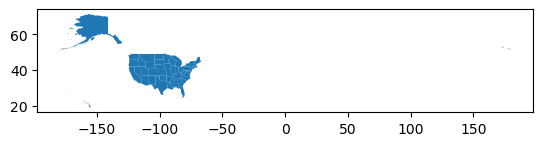

In [87]:
geo_df.plot()

In [88]:
test=geo_df.loc[~geo_df['STUSPS'].isin(['AK','HI'])]

Map saved to Images/us_average_income_map_20241115_155315.png


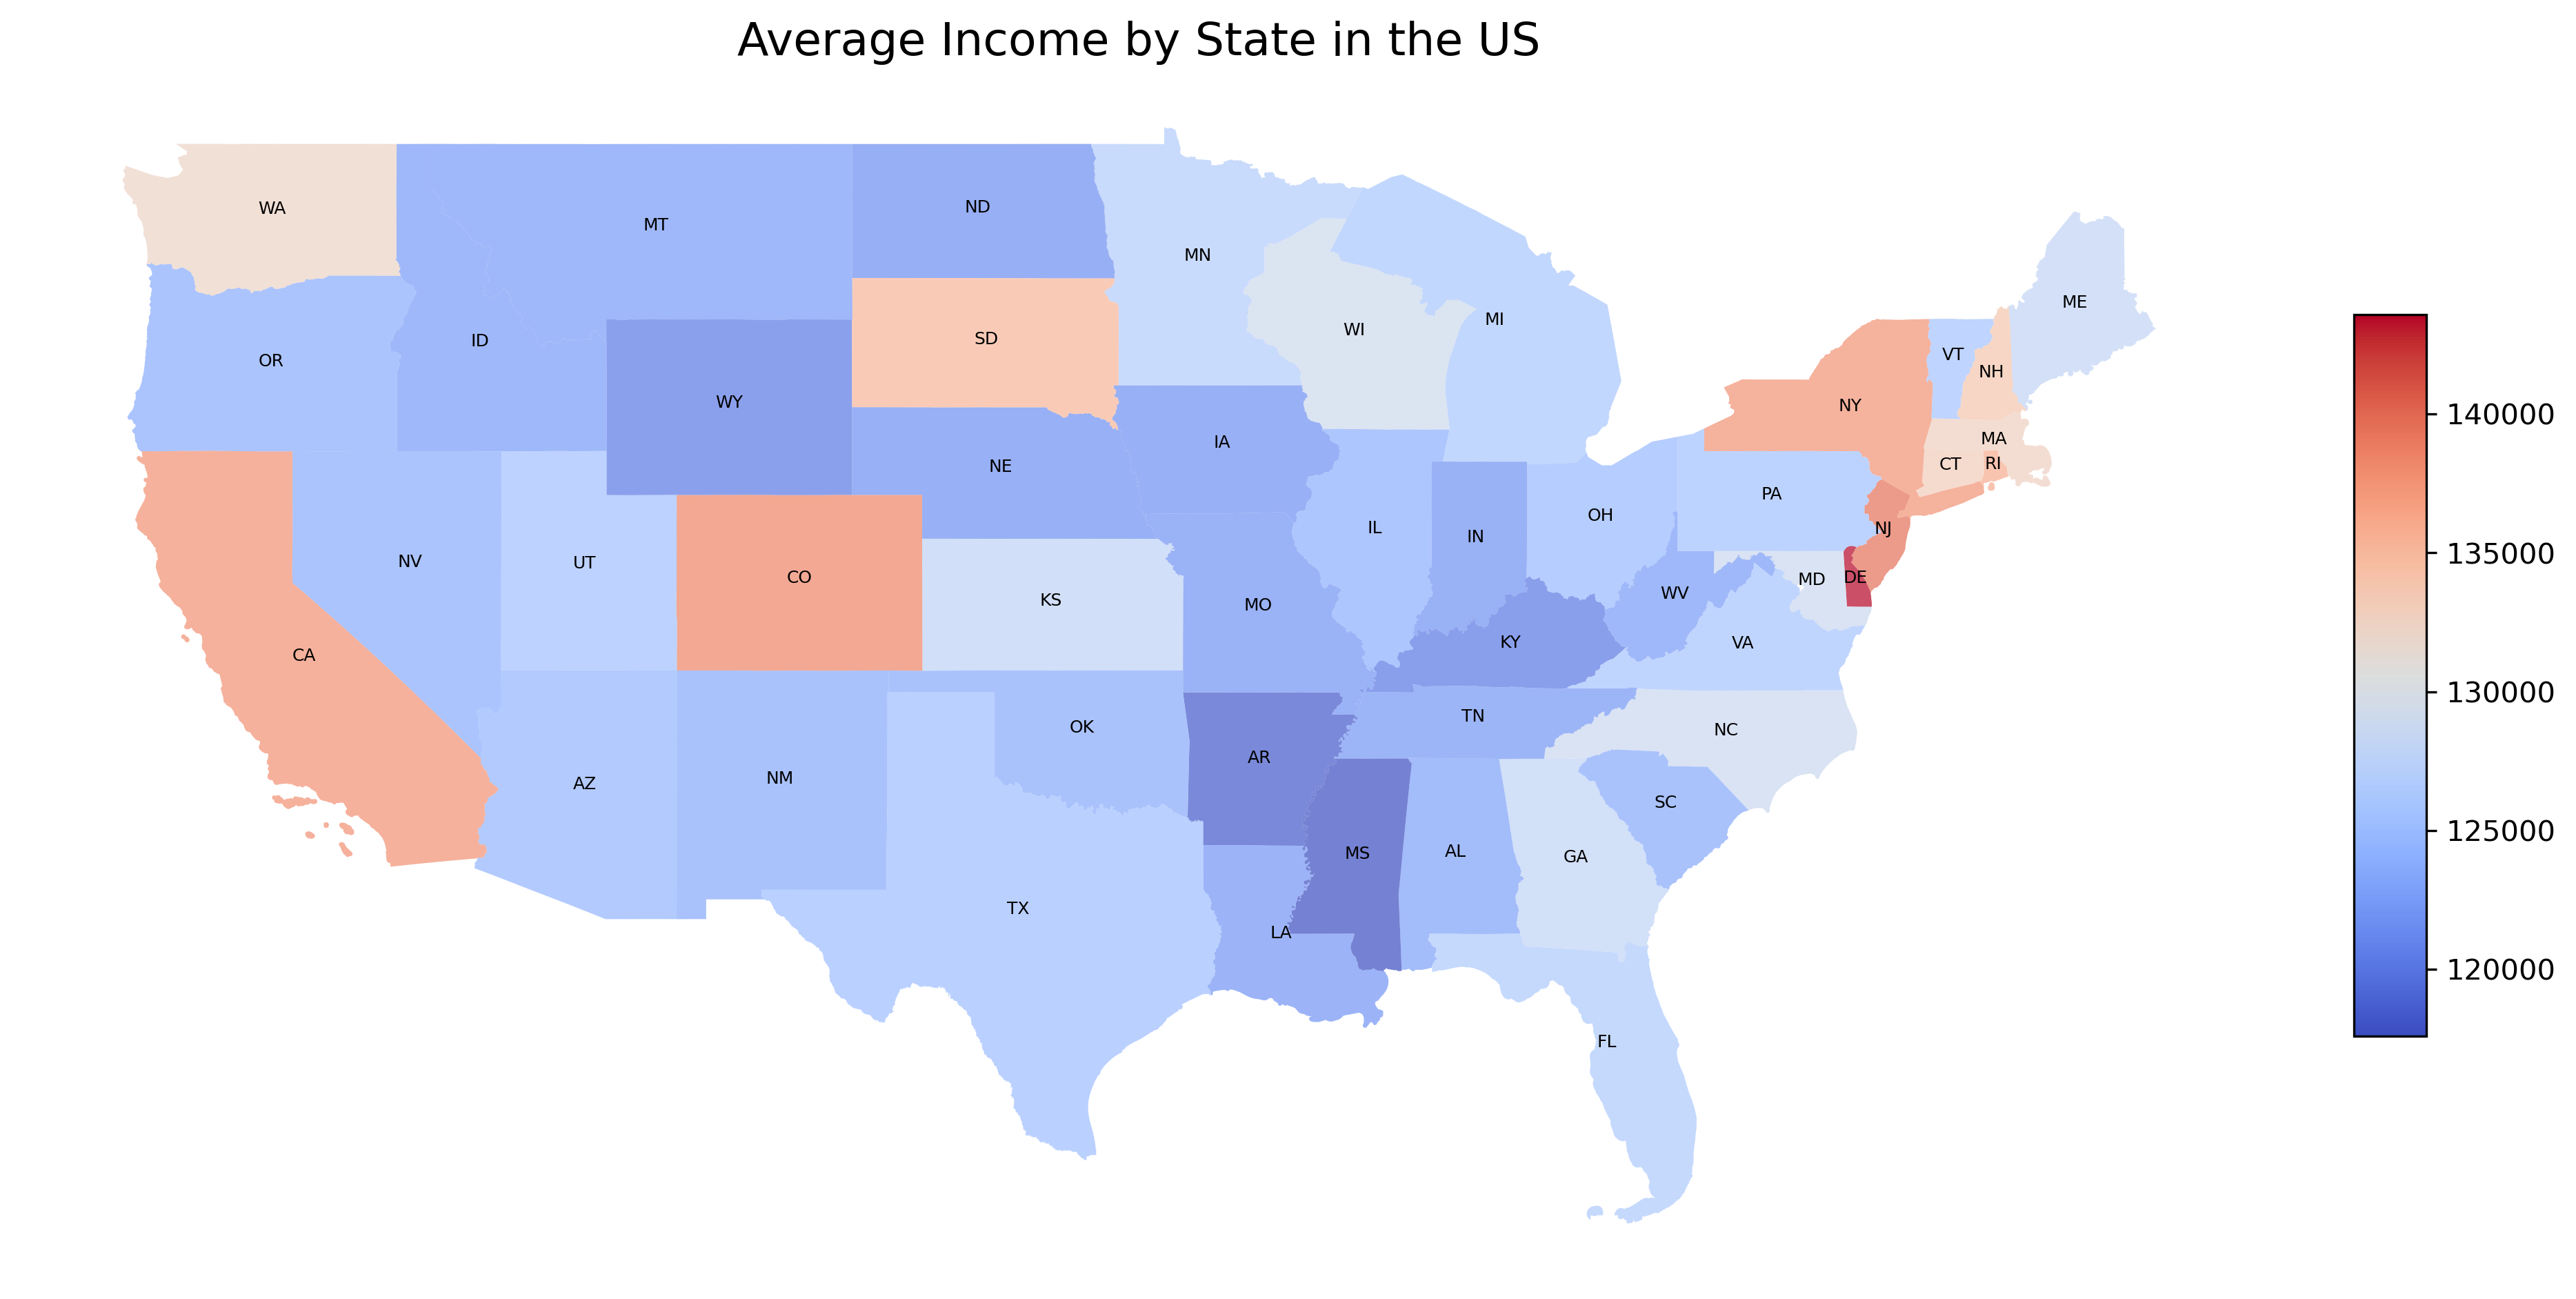

In [ ]:
# Call the fucntion
StatesPlot(test, income_column='Annual Mean Wage', cmap='coolwarm', label_color='Black', label_size=6, 
title='Average Income by State in the US', filename='us_average_income_map.png')

#### Interprutaion

Delaware has the highest concentration of high-paid individuals, based on the annual mean wage data. This distinction may be attributed to its status as a hub for corporate headquarters and financial services.

Other Top States:
- New York: With its dominance in industries such as finance, media, and technology, New York ranks second.
- California: Known for its thriving technology and entertainment sectors, California secures the third position.
- Colorado: Emerging industries like technology, aerospace, and energy significantly contribute to its high rankings.
- New Jersey: Its proximity to New York City, coupled with a robust pharmaceutical and finance sector, makes New Jersey a strong contender.
Geographic Distribution:

> States with urban centers and a strong presence of high-paying industries generally perform better. Coastal states, particularly in the Northeast and West Coast, exhibit a clear advantage over their inland counterparts.

Visualization Highlights:
- Color Intensity: Darker shades on the map represent states with higher average annual wages.
- Clusters of Wealth: States in the Mid-Atlantic and West Coast dominate, showcasing clear contrasts with less urbanized states.

Delaware leading is based on average annual wages per individual (relative concentration of high-paid individuals).


## 5. Exploratory Data Analysis

1. What is the distribution of high-paid individuals across different states?

- Plot 1: Bar plot showing the number of high-paid individuals by state.


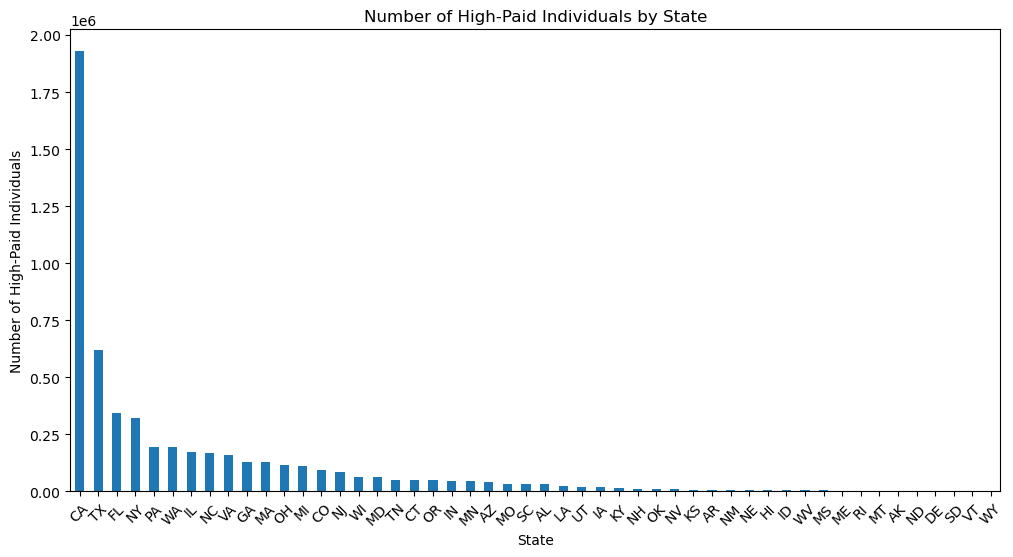

In [70]:
# 1. Distribution of high-paid individuals across different states
# Plot 1: Bar plot
plt.figure(figsize=(12, 6))
merged_df['State Abbriviation'].value_counts().plot(kind='bar')
plt.title('Number of High-Paid Individuals by State')
plt.xlabel('State')
plt.ylabel('Number of High-Paid Individuals')
plt.xticks(rotation=45)
plt.show()

- Plot 2: Pie chart showing the percentage of high-paid individuals by state.

In [71]:
#Group states with less than a certain threshold into "Other"
threshold = 0.05  # 5% threshold
state_counts = merged_df['State Abbriviation'].value_counts()

# Calculate the percentage of each state
state_percentages = state_counts / state_counts.sum()

# Create a new Series for states above the threshold
filtered_state_counts = state_counts[state_percentages >= threshold]

# Add "Other" category for states below the threshold
other_count = state_counts[state_percentages < threshold].sum()
if other_count > 0:
    filtered_state_counts['Other'] = other_count

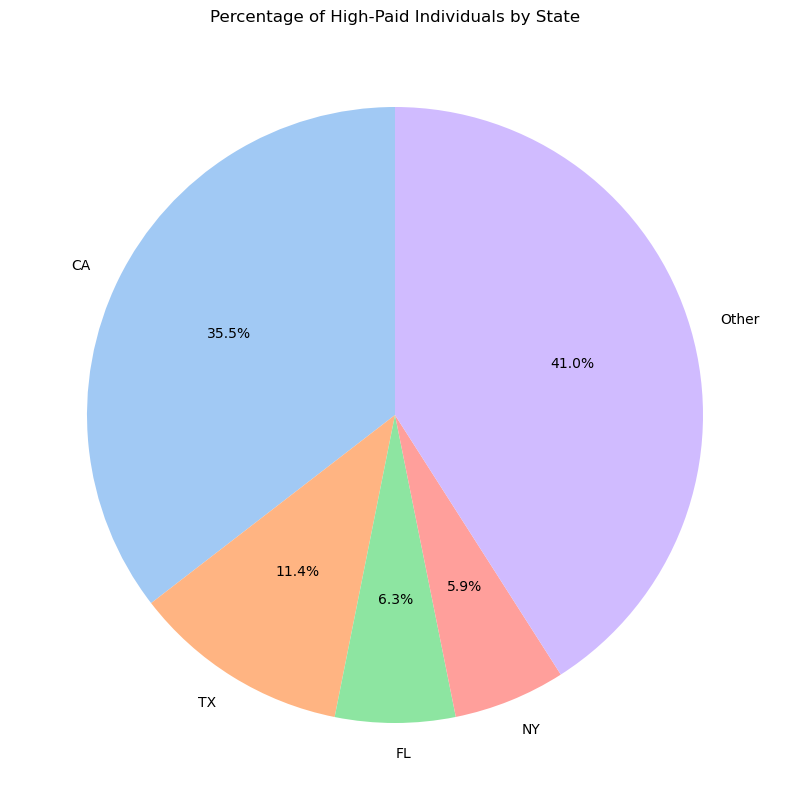

<Figure size 640x480 with 0 Axes>

In [110]:
# Plot the pie chart
plt.figure(figsize=(10, 10))
filtered_state_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Percentage of High-Paid Individuals by State')
plt.ylabel('')  # Hide the y-label
plt.show()
plt.savefig('./Images/Pie_chart_high_paid_by_state.png')

Interpretation: reflect absolute numbers of high-paid individuals due to the sheer population size of these states. For example, California has a larger population, resulting in a higher total number of high-income earners, even if the average income is not the highest.

2. What are the most common occupations among high-paid individuals?

- Plot 1: Bar plot showing the top occupations for high-paid individuals.


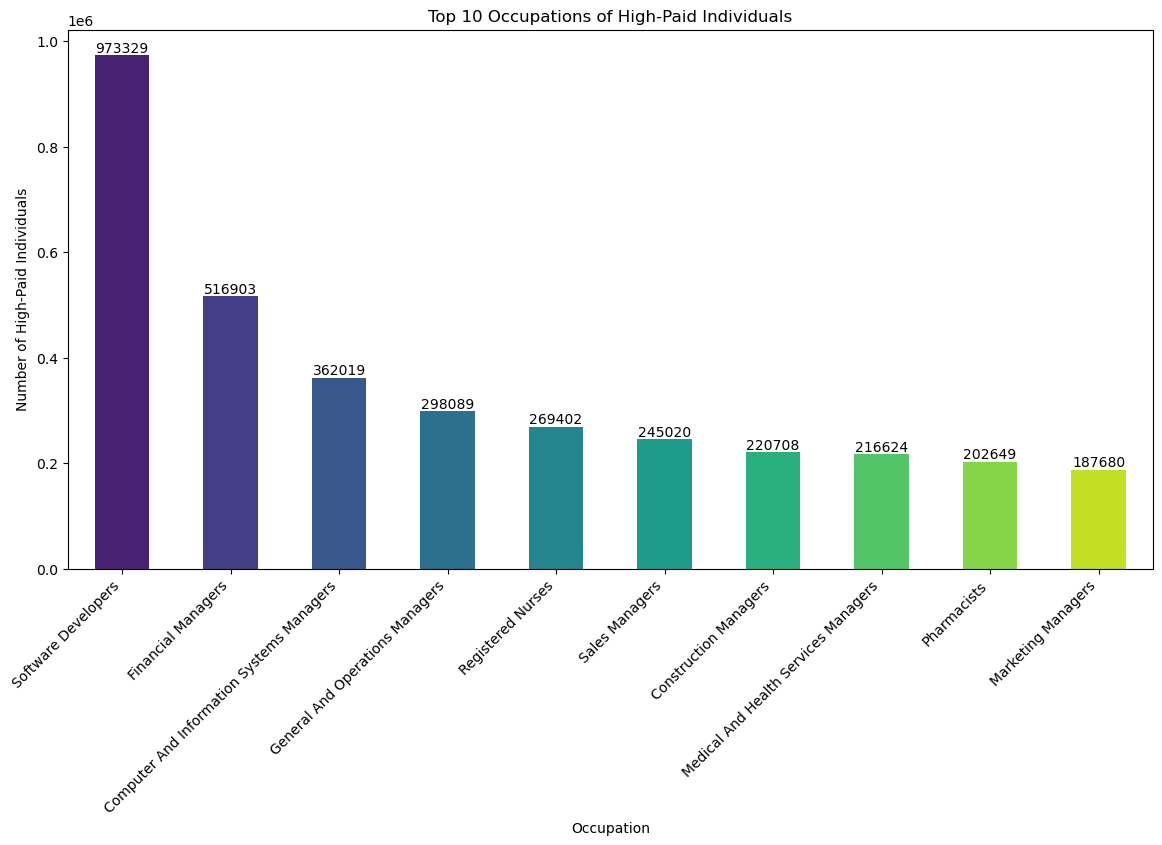

In [72]:
# Plot 1: Bar plot with a color palette
plt.figure(figsize=(14, 7))
top_occupations = merged_df['Occupation Title'].value_counts().head(10)
colors = sns.color_palette("viridis", len(top_occupations))  # Use a color palette

top_occupations.plot(kind='bar', color=colors)
plt.title('Top 10 Occupations of High-Paid Individuals')
plt.xlabel('Occupation')
plt.ylabel('Number of High-Paid Individuals')
plt.xticks(rotation=45, ha='right')

# Add text labels on top of the bars
for p in plt.gca().patches:
    plt.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', fontsize=10)

plt.show()

- **Plot 2**: Horizontal bar plot for better readability of occupation names.


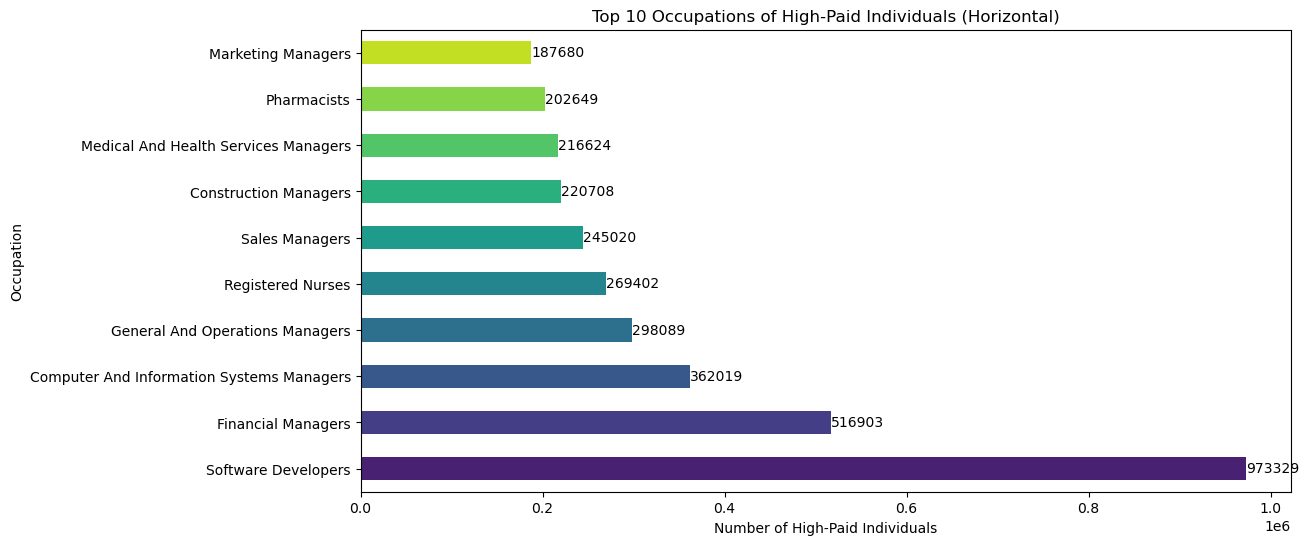

<Figure size 640x480 with 0 Axes>

In [109]:
# Plot 2: Horizontal bar plot with a color palette
plt.figure(figsize=(12, 6))
top_occupations = merged_df['Occupation Title'].value_counts().head(10)

# Use a color palette
colors = sns.color_palette("viridis", len(top_occupations))  # Choose a color palette

top_occupations.plot(kind='barh', color=colors)
plt.title('Top 10 Occupations of High-Paid Individuals (Horizontal)')
plt.xlabel('Number of High-Paid Individuals')
plt.ylabel('Occupation')

# Add text labels on the bars
for index, value in enumerate(top_occupations):
    plt.text(value, index, str(value), va='center')  # Add text labels

plt.show()
plt.savefig('./Images/top_10_OCC_high_paid_indv.png')

Interpretaion :
- Tech Dominance: The top occupations indicate a strong representation from the technology sector, emphasizing its role as a high-paying industry.
Financial Sector Presence: Financial managers' inclusion highlights the importance of financial expertise in driving organizational success.
Management Roles: Both IT and financial management roles underscore the premium paid for leadership positions in specialized fields.
- This visualization reinforces the idea that the highest-paying jobs are often in high-demand, specialized fields like software development and financial management. These sectors require specific skill sets and leadership, which are highly compensated across different regions.

3. What is the relationship between education level and the number of high-paid individuals?

- **Plot 1:** Bar plot showing the number of high-paid individuals by education level.


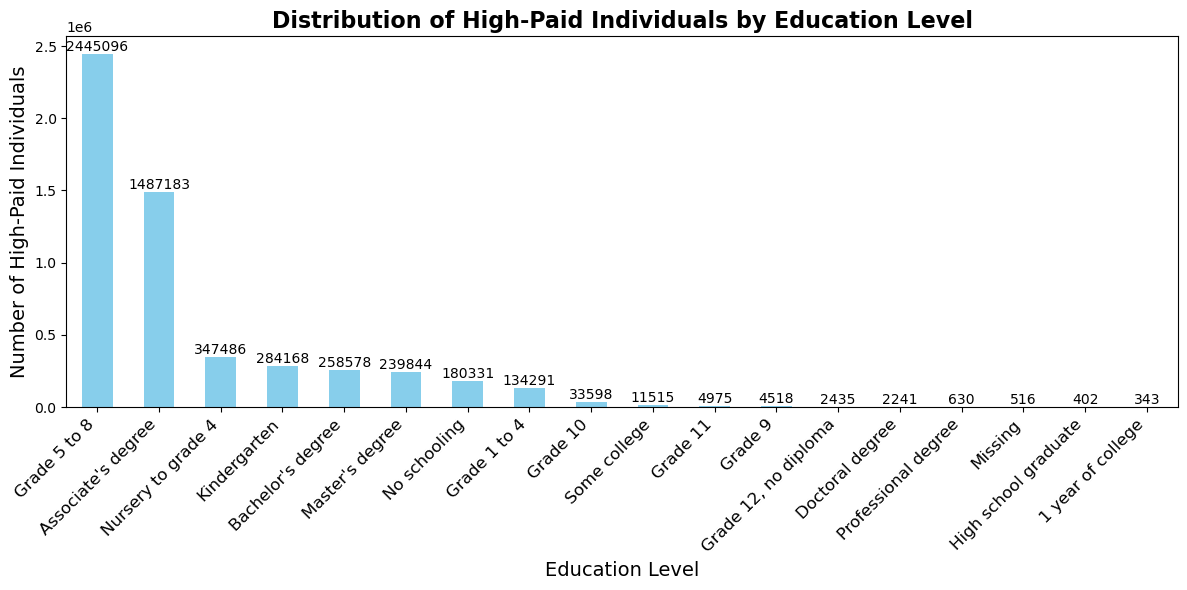

<Figure size 640x480 with 0 Axes>

In [108]:
# 3. Relationship between education level and high-paid individuals
# Plot 1: Bar plot
plt.figure(figsize=(12, 6))
education_counts = merged_df['Education Level'].value_counts()
education_counts.plot(kind='bar', color='skyblue')

# Title and labels
plt.title('Distribution of High-Paid Individuals by Education Level', fontsize=16, fontweight='bold')
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Number of High-Paid Individuals', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adding value annotations on top of the bars
for index, value in enumerate(education_counts):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()  # Adjust layout to make room for labels
plt.show()
plt.savefig('./Images/High_paid_by_Education_Level.png')


- **Plot 2:** Box plot showing the distribution of salaries by education level.


C:\Users\marwa\AppData\Local\Temp\ipykernel_2588\1595419866.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Education Level', y='Annual Mean Wage', data=merged_df, order=education_order, palette='Set2')


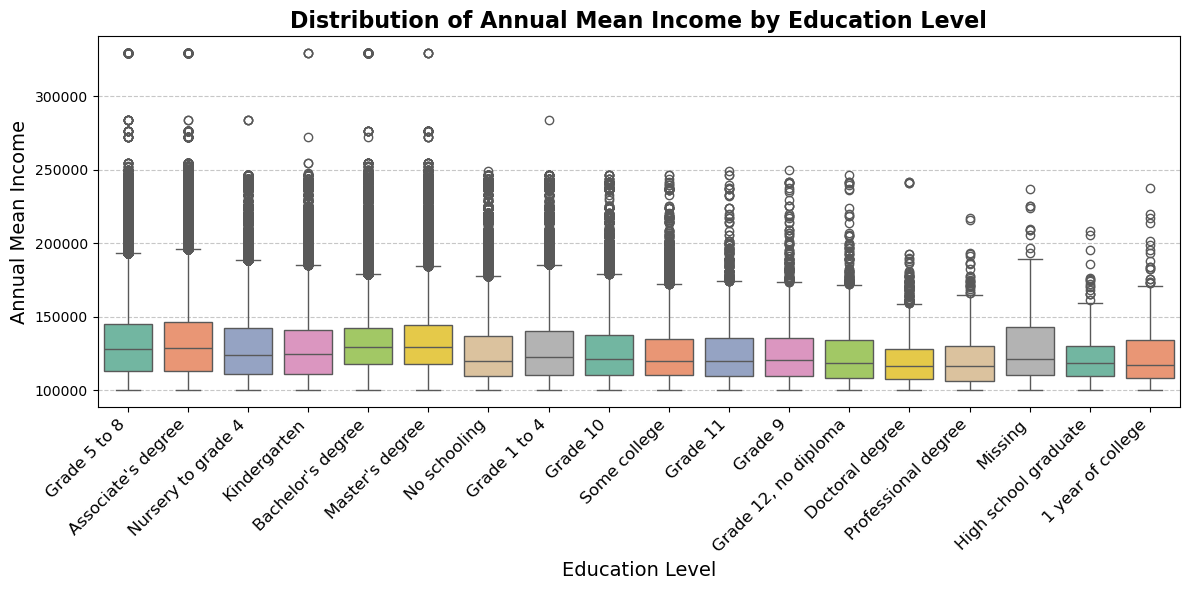

<Figure size 640x480 with 0 Axes>

In [106]:
# Plot 2: Box plot
# Define a custom order for education levels if needed
education_order = merged_df['Education Level'].value_counts().index.tolist()

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Education Level', y='Annual Mean Wage', data=merged_df, order=education_order, palette='Set2')

# Title and labels
plt.title('Distribution of Annual Mean Income by Education Level', fontsize=16, fontweight='bold')
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Annual Mean Income', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()  # Adjust layout to make room for labels
plt.show()
plt.savefig('./Images/Salary_by_ Education_Level.png')

The high incomes for individuals with "Grade 5 to 8," "Associate Degree," and "Nursing to Grade 4" can be explained by the demand for skilled trades and healthcare roles, which require specialized training rather than a four-year degree. These fields, such as nursing and technical professions, offer high salaries due to expertise, certifications, and the labor market's need for skilled workers

4. What is the correlation between salary (A_MEAN) and other numerical features?


In [76]:
# Select only numerical columns from the DataFrame
numerical_columns = merged_df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = merged_df[numerical_columns].corr()

# Filter the correlation to show only the correlation of 'A_MEAN' with other numerical features
salary_correlation = correlation_matrix['Annual Mean Wage'].sort_values(ascending=False)

# Display the correlation values
print(salary_correlation)



Annual Mean Wage      1.000000
Hourly Mean Wage      1.000000
Annual Median Wage    0.894556
Hourly Median Wage    0.894553
Total Employment      0.153764
State code            0.105746
Education Code        0.068410
Age                  -0.027021
Name: Annual Mean Wage, dtype: float64


- **Plot 1:** Heatmap showing the correlation matrix of numerical features.

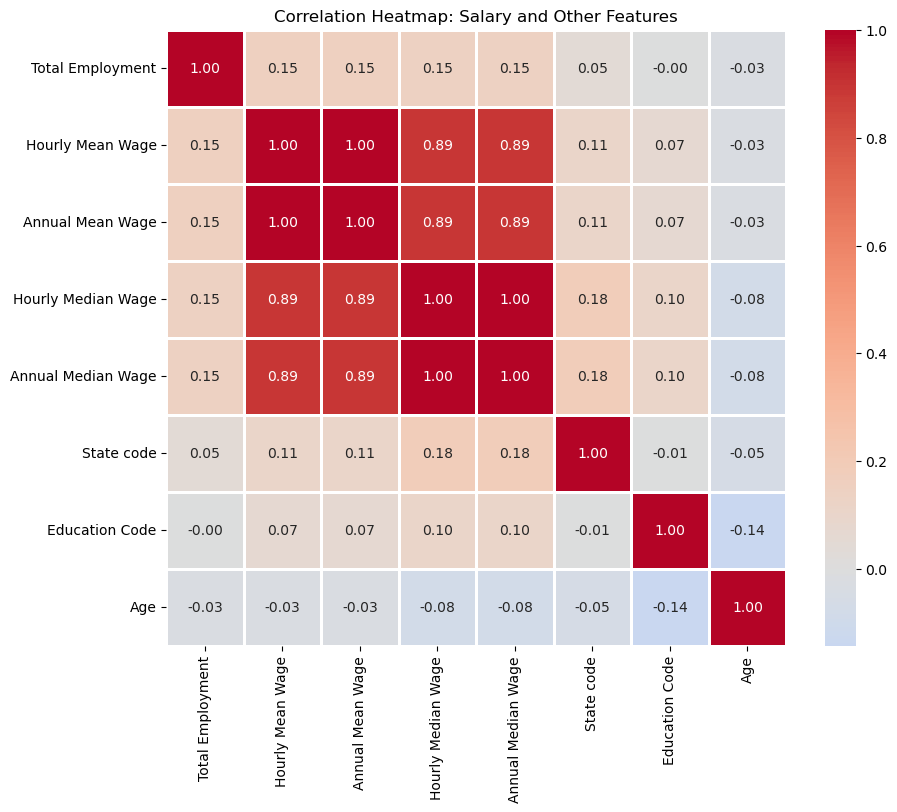

<Figure size 640x480 with 0 Axes>

In [105]:
# Plot heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=1, linecolor='white', fmt=".2f")
plt.title('Correlation Heatmap: Salary and Other Features')
plt.show()
plt.savefig('./Images/Correlation.png')


The small correlation (max 0.15) suggests that salary is influenced by many factors in complex ways, not just the numerical features. It could be due to non-linear relationships, diverse salary ranges across industries, or the presence of outliers, making it hard to capture strong linear correlations.

- **Plot 2:** Scatter plot showing the relationship between A_MEAN and TOT_EMP.

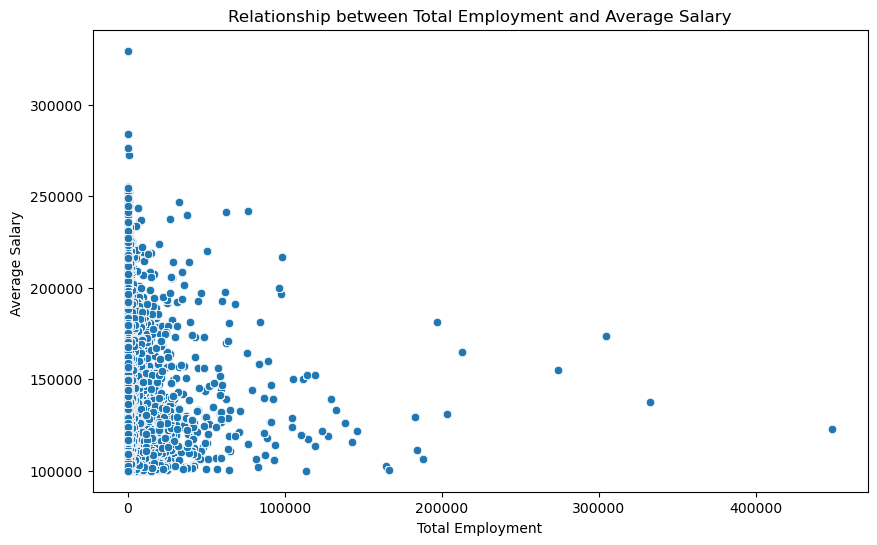

<Figure size 640x480 with 0 Axes>

In [101]:
# Plot 2: Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Employment', y='Annual Mean Wage', data=merged_df)
plt.title('Relationship between Total Employment and Average Salary')
plt.xlabel('Total Employment')
plt.ylabel('Average Salary ')
plt.show()
plt.savefig('./Images/Relationship_between_Total_Employment_and_Average_Salary.png')

5. What is the distribution of high-paid individuals by gender?

- Plot 1: Count of High-Paid Individuals by Gender

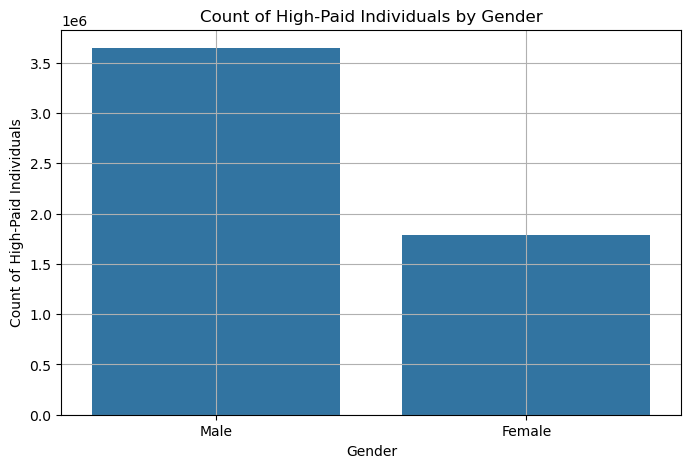

<Figure size 640x480 with 0 Axes>

In [100]:
# Count of high-paid individuals by gender
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=merged_df)
plt.title('Count of High-Paid Individuals by Gender')
plt.xlabel('Gender')
plt.ylabel('Count of High-Paid Individuals')
plt.grid()
plt.show()
plt.savefig('./Images/Count_of_High-Paid_Individuals_by_Gender.png')

- Plot 2: Average Annual Mean Wage by Gender

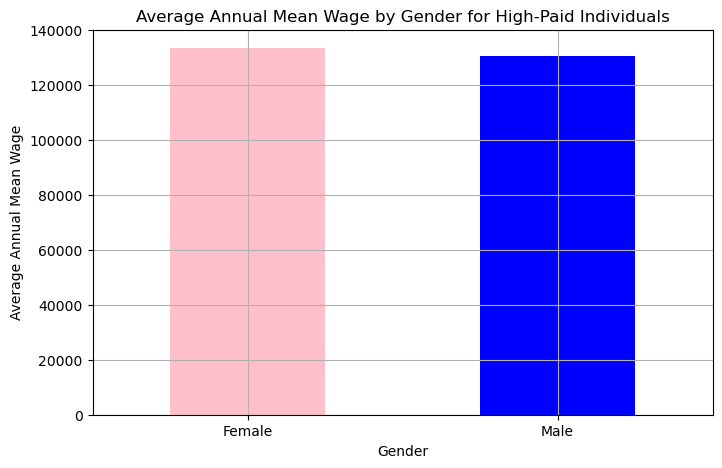

<Figure size 640x480 with 0 Axes>

In [102]:
# Average Annual Mean Wage by Gender
avg_wages_by_gender = merged_df.groupby('Gender')['Annual Mean Wage'].mean()

plt.figure(figsize=(8, 5))
avg_wages_by_gender.plot(kind='bar', color=['pink', 'blue'])
plt.title('Average Annual Mean Wage by Gender for High-Paid Individuals')
plt.xlabel('Gender')
plt.ylabel('Average Annual Mean Wage')
plt.xticks(rotation=0)
plt.grid()
plt.show()
plt.savefig('./Images/Ave_A_Wage_by_Gender_for_High-Paid_Individuals.png')

The results show that in the count of high-paid individuals by gender, males dominate, which is often reflective of the overall gender disparity in high-paying occupations and leadership roles. This is consistent with many industries where more males are in top-paying positions.

However, in the average annual mean wage by gender, females show a slight dominance, suggesting that within the specific high-paying roles analyzed, women may be earning slightly more on average. This could reflect a few things:

- Differences in Occupations: High-paying jobs for women may be concentrated in fields that offer slightly higher wages.
- Smaller Sample Size for Women: There could be fewer women in the data, but their salaries might skew higher due to fewer women in the job market at the high end.
- Sector Differences: Certain sectors, such as healthcare or education, might have fewer men but offer high-paying opportunities for women, leading to a higher average wage.
>The slight difference in wages might also indicate that the top earners in some fields may be women, even though more men hold high-paying roles in other industries.


6. How does the average salary vary across different occupation?

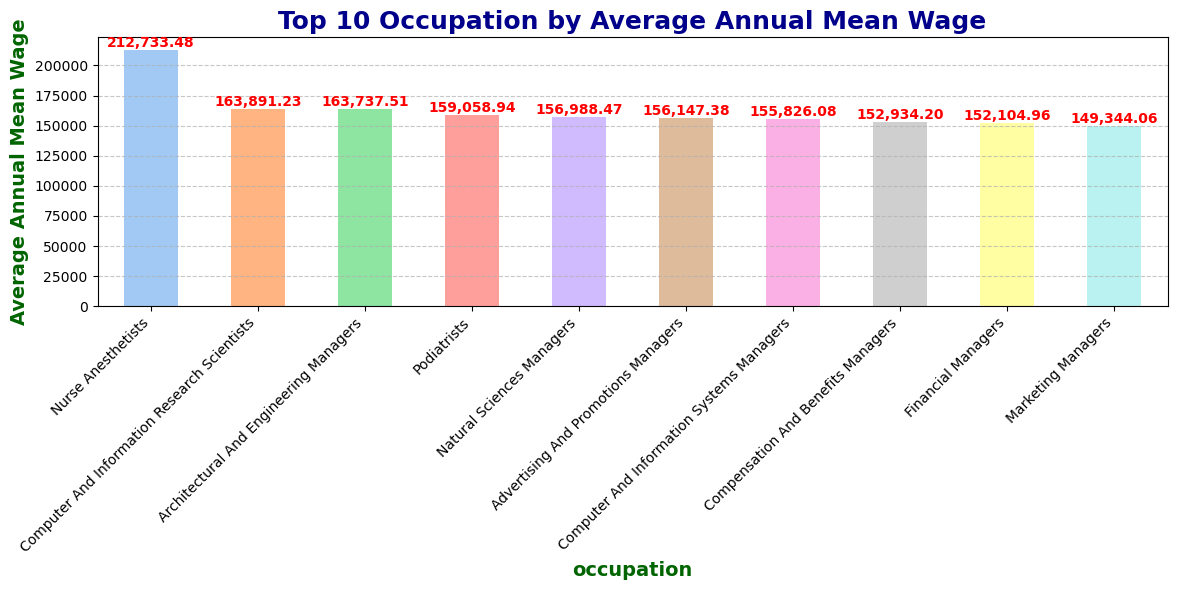

<Figure size 640x480 with 0 Axes>

In [103]:
# # Average Annual Mean Wage by occupation
# Step 1: Calculate the average annual mean wage for each occupation
avg_wages_by_industry = merged_df.groupby('Occupation Title')['Annual Mean Wage'].mean().sort_values(ascending=False)

# Step 2: Create the bar plot for the top 10 industries
plt.figure(figsize=(12, 6))
bars = avg_wages_by_industry.head(10).plot(kind='bar', color=sns.color_palette("pastel", 10))

# Step 3: Add titles and labels with increased font size and color
plt.title('Top 10 Occupation by Average Annual Mean Wage', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('occupation', fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel('Average Annual Mean Wage', fontsize=14, fontweight='bold', color='darkgreen')
plt.xticks(rotation=45, ha='right', fontsize=10, color='black')  # Reduced fontsize to 10
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Step 4: Add data labels on top of the bars with contrasting color
for bar in bars.patches:
    bars.annotate(f'{bar.get_height():,.2f}', 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='bottom', fontsize=10, color='red', fontweight='bold')

plt.tight_layout()  # Adjust layout to make room for labels
plt.show()
plt.savefig('./Images/Top_10_Occupation_by_Average_Annual_Mean_Wage.png')

C:\Users\marwa\AppData\Local\Temp\ipykernel_2588\2475497747.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Occupation Title', y='Annual Mean Wage', data=filtered_df, palette='Set2')


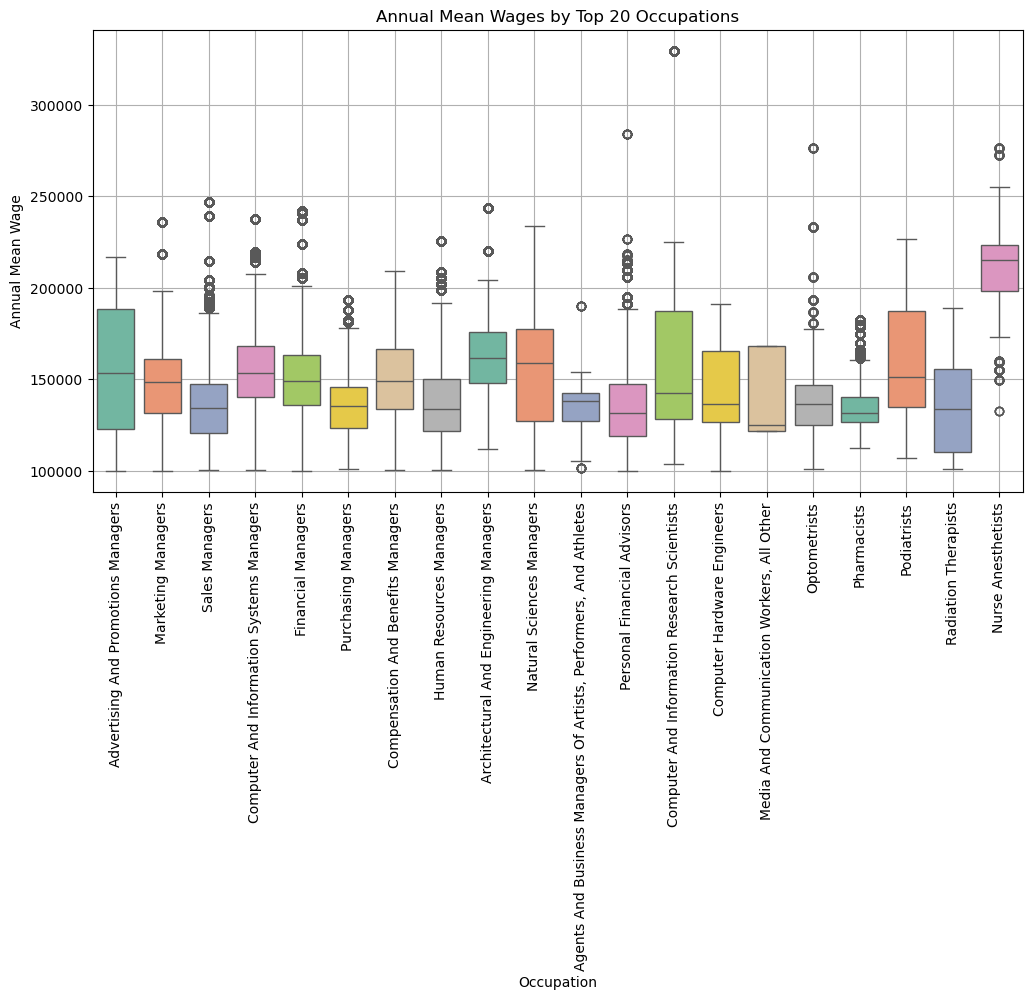

<Figure size 640x480 with 0 Axes>

In [104]:
# # Boxplot of Annual Mean Wages by OCCupation
# Step 1: Calculate the average annual mean wage for each occupation
avg_wages_by_occupation = merged_df.groupby('Occupation Title')['Annual Mean Wage'].mean().sort_values(ascending=False)
# Step 2: Select the top 20 occupations
top_20_occupations = avg_wages_by_occupation.head(20).index
filtered_df = merged_df[merged_df['Occupation Title'].isin(top_20_occupations)]
# Step 3: Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Occupation Title', y='Annual Mean Wage', data=filtered_df, palette='Set2')
plt.xticks(rotation=90)
plt.title('Annual Mean Wages by Top 20 Occupations')
plt.xlabel('Occupation')
plt.ylabel('Annual Mean Wage')
plt.grid()
plt.show()
plt.savefig('./Images/Annual_Mean_Wages_by_Top_20_Occupations.png')

7. How is the distribution of high-paid individuals across different age groups?

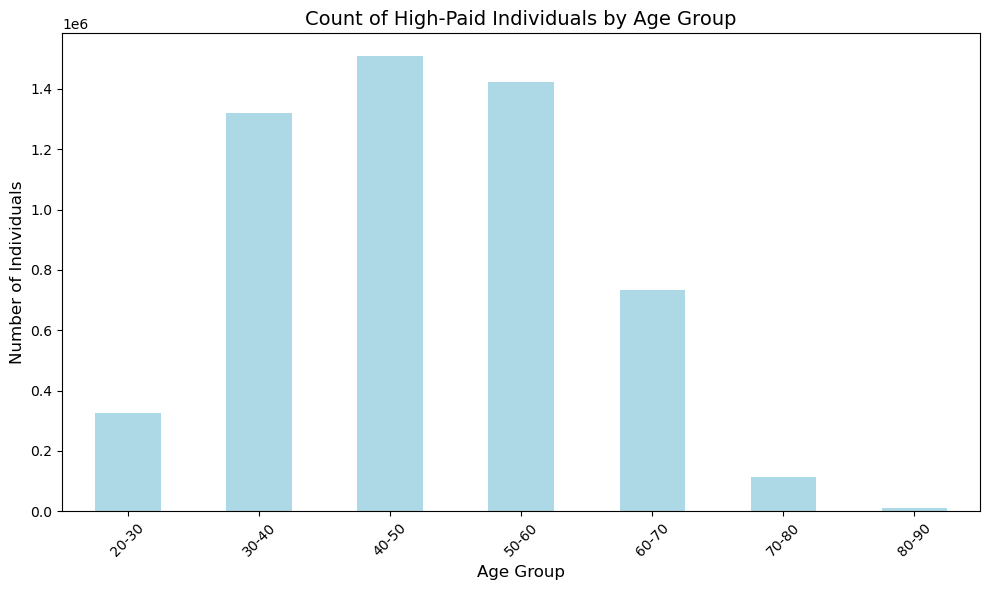

<Figure size 640x480 with 0 Axes>

In [114]:
# Create age groups for better visualization (e.g., 20-30, 30-40, etc.)
bins = [20, 30, 40, 50, 60, 70, 80, 90]
labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90']
merged_df['Age_grp'] = pd.cut(merged_df['Age'], bins=bins, labels=labels, right=False)

# Plot 1: Count of High-Paid Individuals by Age Group
plt.figure(figsize=(10, 6))
merged_df['Age_grp'].value_counts().sort_index().plot(kind='bar', color='lightblue')
plt.title('Count of High-Paid Individuals by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Individuals', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('./Images/High-Paid_Individuals_by_Age_Group.png')